In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [2]:
#Read in the data
df = pd.read_csv('events_Psim vs Persis-edit.csv')
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2,Status
0,PSIM,Baasith,Shot,2,19,70,41,98,44,off
1,PSIM,27.SUGENG,Shot,6,24,91,40,92,41,block
2,PERSIS,21.AGI,Heading,13,38,7,40,3,56,off
3,PERSIS,14.HAMDI,Shot,13,38,6,26,0,33,off
4,PSIM,8.HENDIKA,Shot,14,42,78,25,99,33,off
5,PSIM,27.SUGENG,Shot,16,20,93,27,97,40,on
6,PERSIS,21.AGI,Heading,16,58,3,56,1,50,off
7,PERSIS,11.RIVALDI,Heading,34,9,10,40,2,59,off
8,PERSIS,9.BETO,Shot,35,34,6,48,1,52,off
9,PERSIS,9.BETO,Shot,42,20,21,43,0,31,off


In [3]:
df['X2']=pd.to_numeric(df['X2'], errors='coerce')
df['Y2']=pd.to_numeric(df['Y2'], errors='coerce')
df['X'] = df['X']*1.2
df['Y'] = df['Y']*.8
df['X2'] = df['X2']*1.2
df['Y2'] = df['Y2']*.8

In [4]:
persis = df[df['Team']=='PERSIS'].reset_index()
psim = df[df['Team']=='PSIM'].reset_index()

In [5]:
persis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   20 non-null     int64  
 1   Team    20 non-null     object 
 2   Player  20 non-null     object 
 3   Event   20 non-null     object 
 4   Mins    20 non-null     int64  
 5   Secs    20 non-null     int64  
 6   X       20 non-null     float64
 7   Y       20 non-null     float64
 8   X2      20 non-null     float64
 9   Y2      20 non-null     float64
 10  Status  20 non-null     object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.8+ KB


Text(0.6, 0.13, 'Off Target: 17')

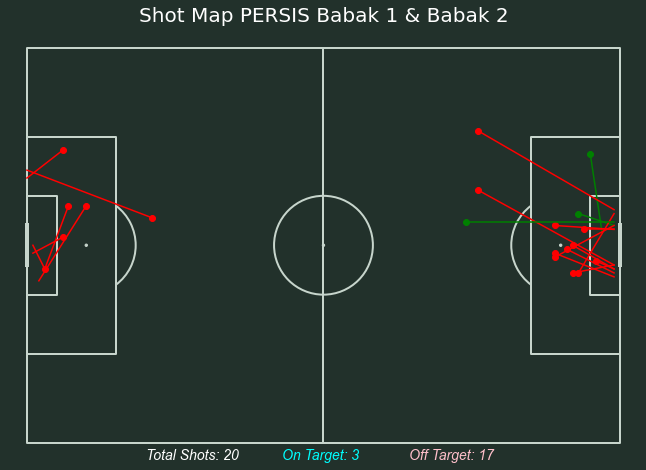

In [6]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

#use a for loop to plot each pass
for x in range(len(persis['X'])):
    if persis['Status'][x] == 'on':
        plt.plot((persis['X'][x],persis['X2'][x]),(persis['Y'][x],persis['Y2'][x]),color='green')
        plt.scatter(persis['X'][x],persis['Y'][x],color='green')
    if persis['Status'][x] == 'off':
        plt.plot((persis['X'][x],persis['X2'][x]),(persis['Y'][x],persis['Y2'][x]),color='red')
        plt.scatter(persis['X'][x],persis['Y'][x],color='red')

plt.title('Shot Map PERSIS Babak 1 & Babak 2',color='white',size=20)

total_shots_persis = len(persis)
total_on_persis = persis[persis['Status']=='on'].value_counts().sum()
total_off_persis = persis[persis['Status']=='off'].value_counts().sum()
#plt.title(f'Total Shots: {total_shots}', fontsize=14, fontfamily='Arial',color='white')
fig.text(.33,.13,f'Total Shots: {total_shots_persis}',fontstyle='italic',fontsize=14,fontfamily='Arial',color='white')
fig.text(.47,.13,f'On Target: {total_on_persis}',fontstyle='italic',fontsize=14,fontfamily='Arial',color='aqua')
fig.text(.60,.13,f'Off Target: {total_off_persis}',fontstyle='italic',fontsize=14,fontfamily='Arial',color='pink')
#.22,.14

Text(0.6, 0.13, 'Off Target: 3')

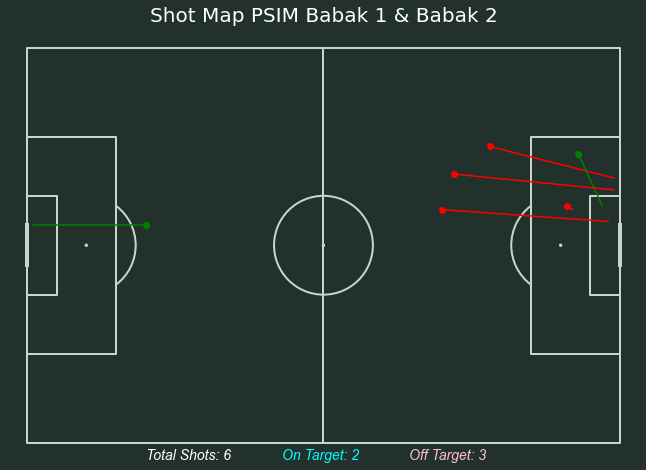

In [7]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

#use a for loop to plot each pass
for x in range(len(psim['X'])):
    if psim['Status'][x] == 'on':
        plt.plot((psim['X'][x],psim['X2'][x]),(psim['Y'][x],psim['Y2'][x]),color='green')
        plt.scatter(psim['X'][x],psim['Y'][x],color='green')
    if psim['Status'][x] == 'off':
        plt.plot((psim['X'][x],psim['X2'][x]),(psim['Y'][x],psim['Y2'][x]),color='red')
        plt.scatter(psim['X'][x],psim['Y'][x],color='red')
    if psim['Status'][x] == 'block':
        plt.plot((psim['X'][x],psim['X2'][x]),(psim['Y'][x],psim['Y2'][x]),color='red')
        plt.scatter(psim['X'][x],psim['Y'][x],color='red')

plt.title('Shot Map PSIM Babak 1 & Babak 2',color='white',size=20)

total_shots_psim = len(psim)
total_on_psim = psim[psim['Status']=='on'].value_counts().sum()
total_off_psim = psim[psim['Status']=='off'].value_counts().sum()
#plt.title(f'Total Shots: {total_shots}', fontsize=14, fontfamily='Arial',color='white')
fig.text(.33,.13,f'Total Shots: {total_shots_psim}',fontstyle='italic',fontsize=14,fontfamily='Arial',color='white')
fig.text(.47,.13,f'On Target: {total_on_psim}',fontstyle='italic',fontsize=14,fontfamily='Arial',color='aqua')
fig.text(.60,.13,f'Off Target: {total_off_psim}',fontstyle='italic',fontsize=14,fontfamily='Arial',color='pink')
#.22,.14

In [8]:
xg = pd.read_csv('XG_Psim vs Persis.csv')
xg

,team,minutes,xG
0,PSIM,2.0,0.01
1,PSIM,6.0,0.28
2,PERSIS,13.2,0.15
3,PERSIS,13.4,0.05
4,PSIM,14.0,0.03
5,PSIM,16.0,0.08
6,PERSIS,17.0,0.20
7,PERSIS,34.0,0.19
8,PERSIS,35.0,0.20
9,PERSIS,42.0,0.08


In [9]:
#now that we have our dataframe set up, we are going to create some lists to plot the different xG values
#4 lists - home and away xg and minutes
#We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]


#this finds our team names from the dataframe. This will only work as long as both teams took a shot
hteam = xg['team'].iloc[0]
ateam = xg['team'].iloc[-1]

for x in range(len(xg['xG'])):
    if xg['team'][x]==ateam:
        a_xG.append(xg['xG'][x])
        a_min.append(xg['minutes'][x])
    if df['Team'][x]==hteam:
        h_xG.append(xg['xG'][x])
        h_min.append(xg['minutes'][x])
        
#this is the function we use to make our xG values be cumulative rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

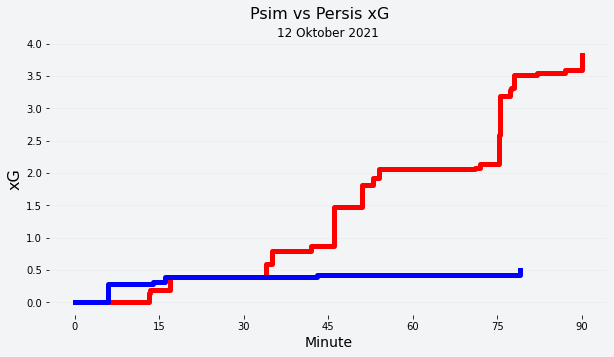

In [10]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#f3f4f5')
ax.patch.set_facecolor('#f3f4f5')

#set up our base layer
mpl.rcParams['xtick.color'] = '#050505'
mpl.rcParams['ytick.color'] = '#050505'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.suptitle('Psim vs Persis xG',fontname='DejaVu Sans',color='black',fontsize=16)
plt.title('12 Oktober 2021',fontname='DejaVu Sans',color='black',fontsize=12)
plt.xlabel('Minute',fontname='DejaVu Sans',color='black',fontsize=14)
plt.ylabel('xG',fontname='DejaVu Sans',color='black',fontsize=16)

#plot the step graphs
ax.step(x=a_min,y=a_cumulative,color='red',label=ateam,linewidth=5,where='post')
ax.step(x=h_min,y=h_cumulative,color='blue',label=ateam,linewidth=5,where='post')

In [11]:
print(h_cumulative)
print(a_cumulative)
print(hlast)
print(alast)

[0, 0.01, 0.29000000000000004, 0.32000000000000006, 0.4000000000000001, 0.43000000000000005, 0.5]
[0, 0.15, 0.2, 0.4, 0.5900000000000001, 0.79, 0.87, 1.47, 1.8199999999999998, 1.92, 2.07, 2.0799999999999996, 2.1399999999999997, 2.59, 3.19, 3.28, 3.32, 3.52, 3.55, 3.59, 3.82]
0.5
3.82
